<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
# !pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame



Load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:

In [4]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.

In [5]:
# Count the number of duplicate rows in the dataset
dup_count = df.duplicated().sum()
print(dup_count)

20


In [6]:
# Display the first few duplicate rows to understand their structure
df_dup = df[df.duplicated()]
df_dup.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [7]:
# Remove duplicate rows from the dataset
df_unique = df.drop_duplicates().copy()

In [8]:
# Verify the removal by counting the number of duplicate rows after removal
print(df_unique.duplicated().sum())

0


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.

In [9]:
# Identify missing values for all columns
null_count = df_unique.isnull().sum().sort_values(ascending=True)
null_count.head(50)

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
Check                                 0
AISelect                           4530
EdLevel                            4653
LearnCode                          4949
NEWSOSites                         5151
YearsCode                          5568
LanguageHaveWorkedWith             5692
SOAccount                          5877
SOVisitFreq                        5901
DevType                            5992
SOComm                             6274
SOHow                              6475
Country                            6507
OpSysPersonal use                  7263
NEWCollabToolsHaveWorkedWith       7845
SurveyEase                         9199
SurveyLength                       9255
LanguageWantToWorkWith             9685
OfficeStackSyncHaveWorkedWith      9892
RemoteWork                        10631
CodingActivities                  10971


In [10]:
# Choose columns with significant missing values
cols_to_impute = ['AINextMuch less integrated', 'AINextLess integrated', 'AINextNo change', 'AINextMuch more integrated']

# Impute with the most frequent value
for col in cols_to_impute:
    mode = df_unique[col].mode()[0]
    df_unique.fillna({col: mode}, inplace=True) # imputation using mode

# Verify imputation
print(df_unique[cols_to_impute].isnull().sum())

AINextMuch less integrated    0
AINextLess integrated         0
AINextNo change               0
AINextMuch more integrated    0
dtype: int64


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [11]:
# Check for missing values in ConvertedCompYearly and handle them if necessary
print('Before imputation:', df_unique['ConvertedCompYearly'].isnull().sum())

# Impute using mean
mean = df_unique['ConvertedCompYearly'].mean()
df_unique['ConvertedCompYearly'] = df_unique['ConvertedCompYearly'].fillna(mean)

# Verify imputation
print('After imputation:', df_unique['ConvertedCompYearly'].isnull().sum())

Before imputation: 42002
After imputation: 0


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [12]:
# Exploring other column
check_cols = pd.DataFrame({
    'Column' : df_unique.columns,
    'Type' : df_unique.dtypes,
    'Unique Values' : df_unique.nunique().values,
    'Missing Values' : df_unique.isnull().sum().values,
    'Values' : [df_unique[col].dropna().unique().tolist() for col in df_unique.columns]
})

# Scan columns with missing values and sort by unique values
check_cols = check_cols[check_cols['Missing Values'] > 0].sort_values(by='Unique Values').reset_index(drop=True)
check_cols.head()

,Column,Type,Unique Values,Missing Values,Values
0,ICorPM,object,2,35636,"[Individual contributor, People manager]"
1,TBranch,object,2,20960,"[No, Yes]"
2,RemoteWork,object,3,10631,"[Remote, In-person, Hybrid (some remote, some ..."
3,PurchaseInfluence,object,3,18031,"[I have some influence, I have little or no in..."
4,SOAccount,object,3,5877,"[Yes, No, Not sure/can't remember]"


In [13]:
# Imputation using mode
mode_SOAccount = df_unique['SOAccount'].mode()[0]
dist_before = df_unique['SOAccount'].value_counts(dropna=False).sort_values()
dist_after = df['SOAccount'].fillna(mode_SOAccount).value_counts(dropna=False).sort_values()

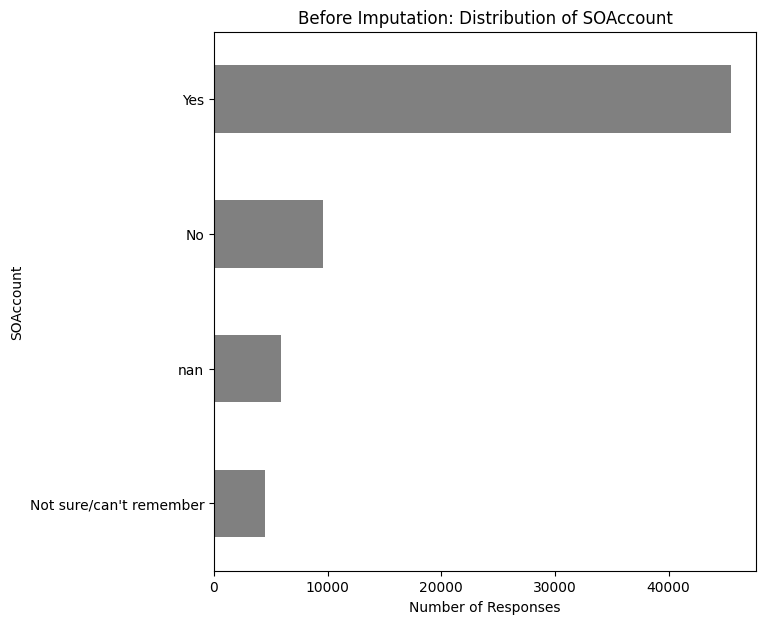

In [14]:
# Visualize the data
ax1 = dist_before.plot(kind='barh', figsize=(7, 7), color='grey')
ax1.set_title('Before Imputation: Distribution of SOAccount')
ax1.set_ylabel('SOAccount')
ax1.set_xlabel('Number of Responses')
plt.show()

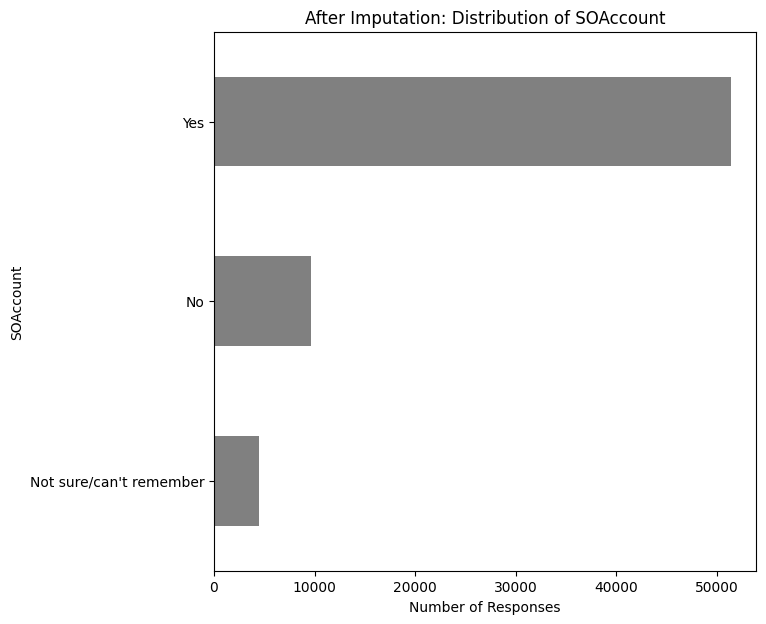

In [15]:
# Visualize the data
ax2 = dist_after.plot(kind='barh', figsize=(7, 7), color='grey')
ax2.set_title('After Imputation: Distribution of SOAccount')
ax2.set_ylabel('SOAccount')
ax2.set_xlabel('Number of Responses')
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
